In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'a2rData_train_ED.csv')
df = pd.read_csv(data_file_path)

In [5]:
from AutoML.analyzer import Analyzer

analyzer = Analyzer(df, target_variable='target_ED_visit', output_dir='./a2r_outputs/analyzer')

analyzer.run()

/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not inf

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['target_ED_visit', 'intent', 'gender', 'disease_site', 'regimen', 'cycle_number', 'esas_depression', 'esas_well_being', 'height', 'creatinine', 'esas_drowsiness', 'patient_ecog', 'bicarbonate', 'mean_corpuscular_hemoglobin_concentration', 'albumin', 'esas_nausea', 'esas_tiredness', 'total_bilirubin', 'eosinophil', 'num_prior_ED_visits_within_5_years', 'age', 'chloride', 'hemoglobin', 'esas_shortness_of_breath', 'esas_appetite', 'monocyte', 'esas_anxiety', 'sodium', 'esas_pain', 'mean_platelet_volume', 'potassium', 'magnesium', 'phosphate']

Continuous: ['alkaline_phosphatase', 'glucose', 'lactate_dehydrogenase', 'red_blood_cell', 'days_since_prev_ED_visit', 'white_blood_cell', 'platelet', 'weight', 'hematocrit', 'alanine_aminotransferase', 'neutrophil', 'aspartate_aminotransferase', 'mean_corpuscular_volume', 'lymphocyte', 'body_surface_area', 'red_cell_distribution_width'

/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. ti

In [9]:
from AutoML.analyzer import Analyzer

analyzer = Analyzer(data, target_variable='target_ED_visit', output_dir='./a2r_outputs/analyzer_updated', config_file='./a2r_outputs/analyzer/config.yaml')

analyzer.run()

Applying changes from config file...



/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


╒══════════════════════════════════════════════════════╤════════════════════════╤═══════════╤════════════════╕
│                                                      │                        │ Missing   │ Overall        │
╞══════════════════════════════════════════════════════╪════════════════════════╪═══════════╪════════════════╡
│ n                                                    │                        │           │ 15484          │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼────────────────┤
│ glucose, mean (SD)                                   │                        │ 0         │ 6.8 (1.9)      │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼────────────────┤
│ neutrophil, mean (SD)                                │                        │ 0         │ 3.1 (1.8)      │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼────────────────┤
│

/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[cont] = self.data[cont].fillna(replace_with)
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[cont] = self.data[cont].fillna(replace_with)
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=F

In [4]:
from AutoML.trainer import TrainerSupervised

df = pd.read_csv('./a2r_outputs/analyzer_updated/updated_data.csv', index_col=0)

trainer = TrainerSupervised(task='binary', output_dir='./a2r_outputs/ED_trainer_explainer',)
trainer.run(df, 'target_ED_visit', k_folds=3)

Training fold 1/3...


/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.loa

Fold 1 score: 0.8680782419901387
Training fold 2/3...


/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.loa

Fold 2 score: 0.8905027128246988
Training fold 3/3...


/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.loa

Fold 3 score: 0.8689431510737118

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
----------------
╒═══════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════╤═══════════════════╤═════════════════════╕
│ model                 │ score_test        │ score_val         │ score_train       │ eval_metric   │ f1                │ average_precision   │
╞═══════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════╪═══════════════════╪═════════════════════╡
│ WeightedEnsemble_L2   │ 0.85 [0.85, 0.86] │ 0.88 [0.87, 0.89] │ 1.0 [1.0, 1.0]    │ roc_auc       │ 0.19 [0.17, 0.23] │ 0.47 [0.45, 0.49]   │
├───────────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────┼───────────────────┼─────────────────────┤
│ ExtraTreesEntr        │ 0.85 [0.84, 0.86] │ 0.87 [0.86, 0.89] │ 1.0 [1.0, 1.0]    │ roc_auc       │ 0.24 [0.21, 0.27] │ 0.46 [0.45, 0.48]   │

Since target_class not specified, SHAP will explain predictions for each class


  0%|          | 0/100 [00:00<?, ?it/s]

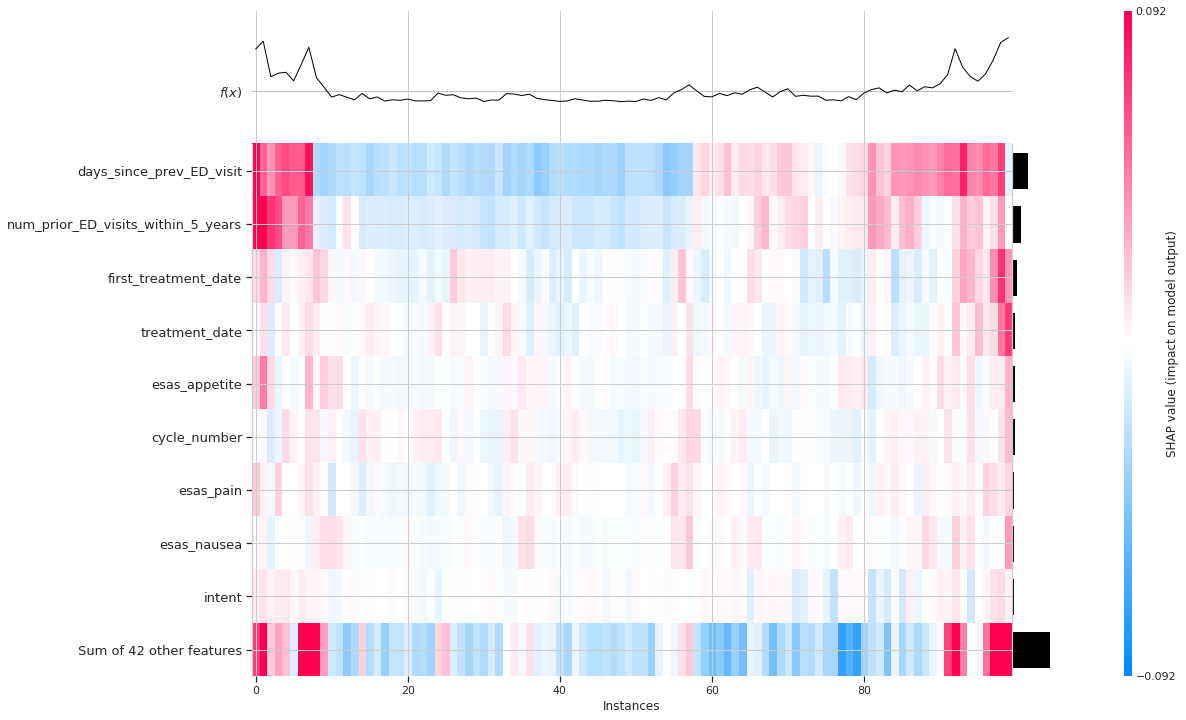

In [5]:
from AutoML.explainer import Explainer

exp = Explainer.from_trainer(trainer)
exp.run()